<h2 style="text-align: center;"><b>Распознавание рукописных символов: MNIST</b></h2>

## Библиотека Keras

Основные возможности

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Keras_logo.svg/250px-Keras_logo.svg.png" width="200">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)

* **Keras**  - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow) 

* Основные принципы: 
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

**keras** - одна из самых популярных библиотек для глубинного обучения 
(надстройка над другими библиотеками).

**keras** использует библиотеку **tensorflow** от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью.
Именно поэтому сейчас **tensorflow** - наиболее популярная библиотека для глубинного обучения.

При необходимости при помощи менеджера пакетов питона `pip` выполните установку пакетов `tensorflow` и `keras`.

In [1]:
!pip install keras

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

Построение нейронной сети для решения задачи классификации рукописных цифр
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов. 

Набор данных MNIST часто используются для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

### Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразований, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

Еще мы будем использовать данные MNIST - они тоже лежат прямо в `keras`, как достать этот датасет рассмотрим дальше.


In [1]:
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, поскольку у нас уже установлена вторая,
# то просто будем ее использовать.

C:\Users\SNTkachenko\Anaconda3_2011\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.11.0
We are using Keras 2.11.0


Обратим внимание, что вывод ячейки `Using TensorFlow backend.` - это означает, что в качестве бэкэнда используется библиотека для вычисления `tensorflow`.

### Дополнительная функция

Здесь написана дополнительная функция, необходимая для демонстрации каритнок из датасета

In [3]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N примеров каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape 
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class 
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

### 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [4]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [5]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** примеров из массива картинок
**X_train** для каждого класса

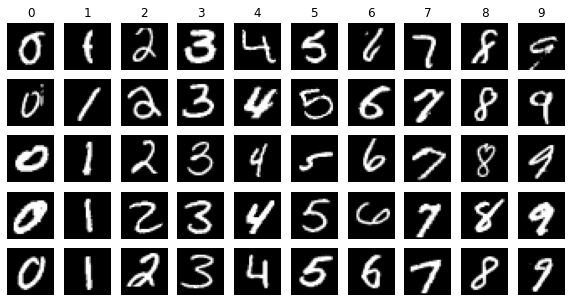

In [6]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=5)

In [7]:
x=X_train[10]
type(x)

numpy.ndarray

### 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**




Для корректной работы нейронных сетей необходима предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$. 

При этом каждый пиксель картинки представлен в виде целого числа от $0$ до $255$ (для черно-белых картинок) и в виде набора из трех целых чисел от $0$ до $255$ для цветных.

Поэтому нормализацию картинки можно произвести простым делением на $255$.

Еще нейронной сети нужно значение выходной переменной в one-hot формате.

В текущий момент наша целевая переменная - это цифры от $0$ до $9$, то есть $10$ классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов. 

Соответственно, истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка (то есть вероятность $1$, что цифра на самом деле принадлежит к конкретному классу).

Подобные действия выполняются функцией из `keras` `keras.utils.to_categorical`, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
X_train=X_train/255


In [12]:
X_test=X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train.min()

0.0

In [15]:
X_train.max()

1.0

In [16]:
from keras.utils import np_utils

In [17]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [18]:
y_test.shape

(10000, 10)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_train.shape

(60000, 10)

In [22]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки (метод **shape**)

Для данных MNIST это изображения 28 на 28.

In [23]:
input_size = X_train[0].shape
input_size

(28, 28)

In [24]:
X_train.shape

(60000, 28, 28)

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [64]:
# Создаем пустую модель
model = Sequential()
model

In [65]:
# Этот слой превратит нашу двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))
#И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав минимизируемую функцию потерь (параметр `loss`), 
оптимизатор (параметр `optimizer`, который позаботится об изменении весов модели) и метрику (параметр `metrics`), по которой будет оцениваться точность работы на тестовой выборке в процессе обучения

In [66]:
from tensorflow.keras.optimizers import Adam

In [74]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy','mse'])

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную генерализационную способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке. 

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения). 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [75]:
# обучаем модель, 5 эпох, размер батча 64
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0195 - accuracy: 0.9943 - mse: 9.2940e-04
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0149 - accuracy: 0.9958 - mse: 6.8670e-04
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0132 - accuracy: 0.9959 - mse: 6.3307e-04
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0102 - accuracy: 0.9974 - mse: 4.5085e-04
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0082 - accuracy: 0.9979 - mse: 3.5671e-04
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0067 - accuracy: 0.9984 - mse: 2.7845e-04
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0084 - accuracy: 0.9977 - mse: 3.9220e-04
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 0.9981 - mse: 3.3489e-04
Epoch 9/10
938/938 [==============================] - 2s

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
 activation_13 (Activation)  (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [77]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9738 - mse: 0.0042


[0.10739243030548096, 0.973800003528595, 0.0042223553173244]